# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv('MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv' , delimiter=',')


print(df.head(10))
print(df.columns)


                                              title       Marca  Preco_Normal  \
0              Pack 12 un, Leche extra proteína 1 L  Loncoleche         19788   
1   Pack 12 un, Leche chocolate receta original 1 L     Soprole         18228   
2    Pack 12 un, Leche semidescremada chocolate 1 L     Soprole         18228   
3     Pack 12 un, Leche semidescremada frutilla 1 L     Soprole         18228   
4       Pack 12 un, Leche sin lactosa chocolate 1 L  Loncoleche         17988   
5        Pack 12 un, Leche sin lactosa frutilla 1 L  Loncoleche         17988   
6  Pack 12 un, Leche saborizada light chocolate 1 L  Loncoleche         17988   
7         Pack 12 un, Leche saborizada frutilla 1 L       Colun         17388   
8         Pack 12 un, Leche saborizada vainilla 1 L       Colun         17388   
9           Pack 12 un, Leche saborizada manjar 1 L       Colun         17388   

   Preco_Desconto  Preco_Anterior  Desconto Categoria  
0               0               0         0   lacteo

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [15]:
#Seu código aqui para a média

media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().sort_values()
print(media_por_categoria)


Categoria
instantaneos-y-sopas           765.491228
verduras                      1343.296875
frutas                        1724.473684
belleza-y-cuidado-personal    1783.556485
congelados                    2108.042553
lacteos                       2385.219239
comidas-preparadas            3095.043478
Name: Preco_Normal, dtype: float64


In [16]:
#Seu código aqui para a mediana
mediana_por_categoria = df.groupby("Categoria")["Preco_Normal"].median().sort_values()
#Categorias onde a média está acima da mediana:

#instantaneos-y-sopas
#belleza-y-cuidado-personal
#congelados
#lacteos

#Categorias onde a média está abaixo da mediana:

#verduras
#frutas
#comidas-preparadas

Digite aqui as categorias:Ex: Bebidas, Congelados, Limpeza (isso depende dos dados reais).

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [4]:
#Seu código aqui
desvio_por_categoria = df.groupby("Categoria")["Preco_Normal"].std().sort_values(ascending=False)
print(desvio_por_categoria)

#Categorias com alto desvio padrão também apresentam maior diferença entre média e mediana, o #que indica:

#Presença de outliers ou produtos com preços muito acima da média, que puxam a média para cima.

#Uma alta variabilidade de preços dentro da mesma categoria, ou seja, os produtos são bastante #heterogêneos em termos de valor.

#Esse comportamento é visível, por exemplo, nas categorias lácteos, beleza-y-cuidado-personal #e congelados, onde a média supera a mediana, reforçando a hipótese de valores extremos para #alguns produtos.

Categoria
lacteos                       3925.816164
belleza-y-cuidado-personal    2210.041719
congelados                    2111.539896
comidas-preparadas            2019.911428
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


Digite nesse campo o comportamento que você identificou.Ex: Categorias com alto desvio padrão também têm maior diferença entre média e mediana, indicando presença de outliers ou grande variação de preços.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

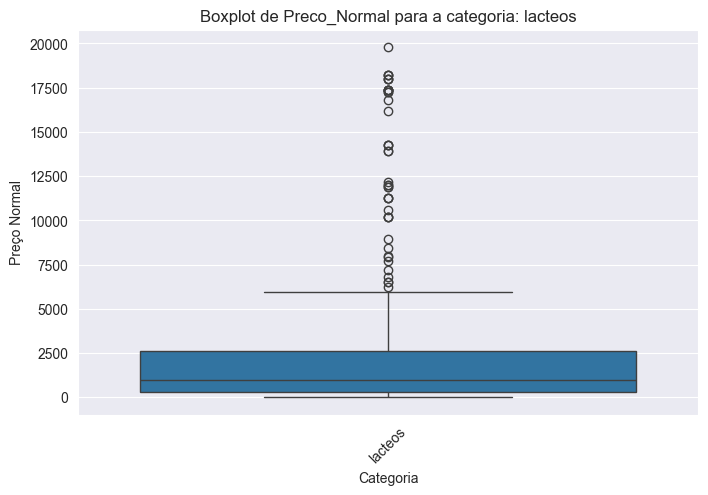

In [5]:
#Seu código aqui
# Filtrando o DataFrame
df_categoria = df.loc[df['Categoria'] == 'lacteos']

# Boxplot com seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_categoria, x="Categoria", y="Preco_Normal")
plt.title("Boxplot de Preco_Normal para a categoria: lacteos")
plt.ylabel("Preço Normal")
plt.xticks(rotation=45)
plt.show()

#Ao analisar o boxplot da variável Preco_Normal para a categoria lacteos, observamos que:

#A mediana do preço está posicionada mais próxima da base da caixa, indicando que a maioria #dos preços concentra-se na faixa mais baixa.

#Há uma grande amplitude interquartil (diferença entre o 1º e 3º quartil), o que indica alta #variabilidade nos preços dentro dessa categoria.

#Existem muitos outliers acima do limite superior do boxplot, o que evidencia a presença de #produtos com preços significativamente mais altos do que o padrão da categoria.

#Esses outliers podem indicar produtos premium ou erros de cadastro (preços fora da realidade #do segmento), e merecem uma investigação mais aprofundada.


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

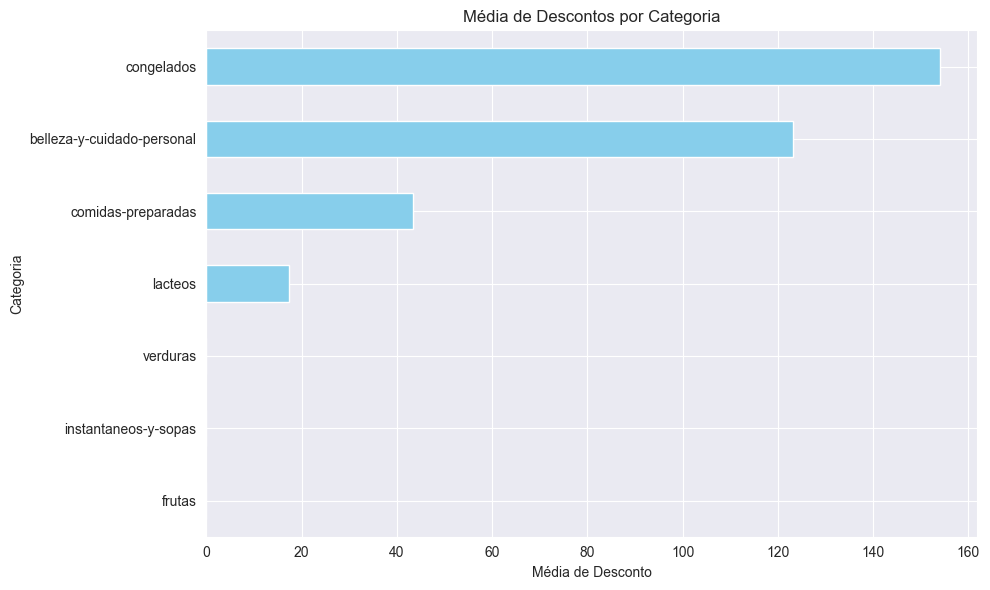

In [6]:
# Seu código aqui
media_desconto = df.groupby("Categoria")["Desconto"].mean().sort_values()

plt.figure(figsize=(10,6))
media_desconto.plot(kind="barh", color="skyblue")
plt.xlabel("Média de Desconto")
plt.title("Média de Descontos por Categoria")
plt.tight_layout()
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [7]:
# Seu código aqui
df_agrupado = df.groupby(["Categoria", "Marca"]).agg({"Desconto": "mean"}).reset_index()

# Mapa interativo (scatter plot simulando um mapa categórico)
fig = px.scatter(df_agrupado,
                 x="Categoria",
                 y="Marca",
                 size="Desconto",
                 color="Desconto",
                 title="Média de Descontos por Categoria e Marca",
                 labels={"Desconto": "Média de Desconto"},
                 height=600)
fig.show()
